# DataMining - Classification - UAS

---


## Classification SVM Algorithm - Mobile Phone Dataset

Dataset : https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=test.csv


In [ ]:
data_train = 'https://raw.githubusercontent.com/zanuarts/MobilePrice-Notebook/master/datasets/train.csv'
data_test = 'https://raw.githubusercontent.com/zanuarts/MobilePrice-Notebook/master/datasets/test.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(data_train)

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Korelasi Data')

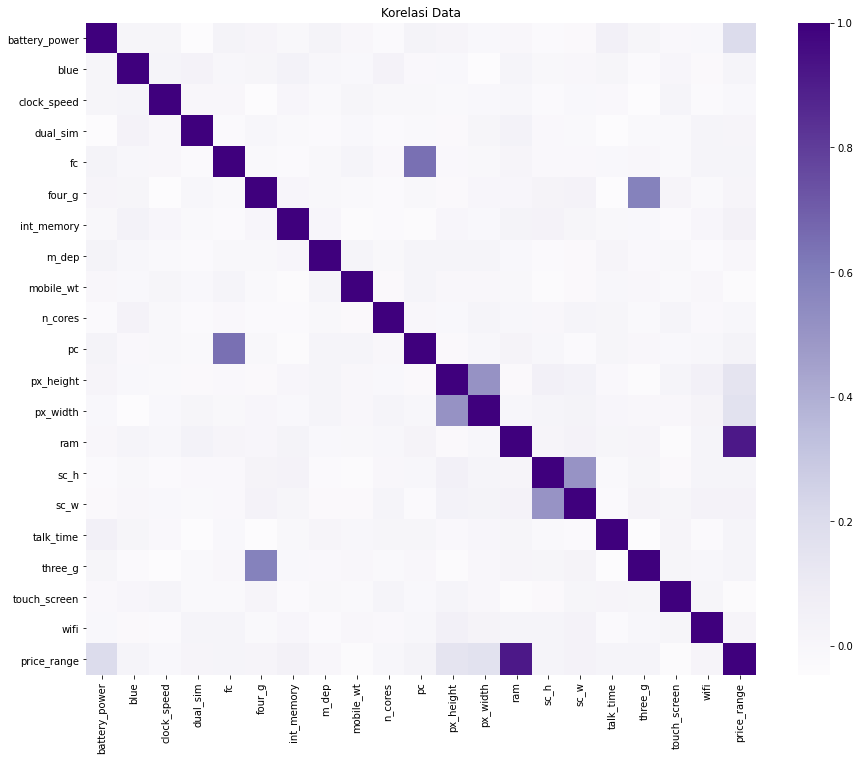

In [ ]:
import seaborn as sns

corr = df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Korelasi Data")

### Korelasi Data

---

Berdasarkan korelasi data yang dibuat, terdapat heat zone yang sangat berkorelasi dengan harga ponsel yang ada.
1. RAM
2. Baterai
3. 3G dan 4G
4. pc (Kamera utama) & fc (Kamera depan)
5. px_weight(Pixel Resolution Width) & px_height(Pixel Resolution Height)
6. sc_w(Screen Width of mobile in cm) & sc_h(Screen Height of mobile in cm)

In [ ]:
# Jumlah nilai korelasi terkuat

corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

### SVM (Support Vector Machine) Classification


---


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['price_range'], axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [ ]:
len(x_train)

1600

In [ ]:
len(y_test)

400

### First Model

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print('train accuracy : ', svm.score(x_train, y_train))
print('test accuracy : ', svm.score(x_test, y_test))

train accuracy :  0.95375
test accuracy :  0.9425


### Seleksi Fitur

Ini dibuat agar fitur (x) yang dimasukan tidak terlalu banyak, jadi dipilih beberapa fitur terbaik yang mempengaruhi price range yang ada.


Berikut merupakan beberapa metode untuk melakukan seleksi fitur:

*   SelectKBest: removes all but the highest scoring features
*   For classification generally these methods are used: chi2, f_classif, mutual_info_classif


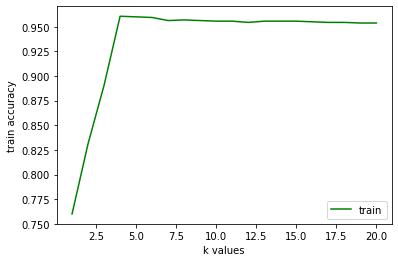

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

accuracy_list_train = [] # array untuk nampung fitur x
k = np.arange(1,21,1) # list kolom 1-20
for each in k: # looping setiap isi kolom
  x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train) # x_new sebagai kolom fitur
  svm.fit(x_new, y_train) # train kolom fitur dengan price range
  accuracy_list_train.append(svm.score(x_new, y_train)) #score train dimasukan ke dalam array 

plt.plot(k, accuracy_list_train, color='green', label='train')
plt.xlabel('k values')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

In [ ]:
d = {'best features number' : k, 'train_score' : accuracy_list_train}
df = pd.DataFrame(data=d)
print('max_accuracy : ', df['train_score'].max())
print('max_accuracy id : ', df['train_score'].idxmax())

max_accuracy :  0.960625
max_accuracy id :  3


In [ ]:
print('max accuracy values : \n', df.iloc[3])

max accuracy values : 
 best features number    4.000000
train_score             0.960625
Name: 3, dtype: float64


In [ ]:
selector = SelectKBest(f_classif, k = 3)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'px_width' 'ram']
x test features: ['battery_power' 'px_width' 'ram']


### Model Baru dengan Seleksi Fitur

In [ ]:
svm_model = SVC()
svm_model.fit(x_new, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('train akurasi : ', svm_model.score(x_new, y_train))
print('test akurasi : ', svm_model.score(x_new_test, y_test))

train akurasi :  0.890625
test akurasi :  0.9075


### Save Model

In [ ]:
import pickle

pickle.dump(svm_model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

### Test Model

In [ ]:
df = pd.read_csv(data_test)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df = df[['battery_power', 'px_width', 'ram']]

In [ ]:
svm_pred = svm_model.predict(df)

### Melihat hasil

In [ ]:
svm_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 1, 2, 1, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
df['price_range_result'] = svm_pred.tolist()
df

,battery_power,px_width,ram,price_range_result
0,1043,1412,3476,3
1,841,857,3895,3
2,1807,1366,2396,2
3,1546,1752,3893,3
4,1434,810,1773,1
...,...,...,...,...
995,1700,913,2121,2
996,609,1632,1933,1
997,1185,825,1223,0
998,1533,832,2509,2


In [ ]:
df.to_excel('result_mobile_price.xlsx')